<a href="https://colab.research.google.com/github/PrithviRaajan/MachineLearning-Projects/blob/main/RecSystem_(NLP_based_using_Universal_Sentence_Encoder).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import TensorFlow and hub
import tensorflow as tf
import tensorflow_hub as hub

# Plotting
import matplotlib.pyplot as plt

# some important packages
import os
import re
import numpy as np
import pandas as pd

# scikit-learn
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

In [ ]:
model_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(model_url)
print('Model Loaded')

Model Loaded


In [ ]:
def embed(texts):
    return model(texts)

In [ ]:
embed(['This movie!'])

In [ ]:
df = pd.read_csv("/content/Top_10000_Movies.csv", engine="python")
df.head()

,Unnamed: 0,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genre,overview,revenue,runtime,tagline
0,0,580489.0,en,Venom: Let There Be Carnage,5401.308,2021-09-30,6.8,1736.0,"['Science Fiction', 'Action', 'Adventure']",After finding a host body in investigative rep...,424000000.0,97.0,NaN
1,1,524434.0,en,Eternals,3365.535,2021-11-03,7.1,622.0,"['Action', 'Adventure', 'Science Fiction', 'Fa...",The Eternals are a team of ancient aliens who ...,165000000.0,157.0,In the beginning...
2,2,438631.0,en,Dune,2911.423,2021-09-15,8.0,3632.0,"['Action', 'Adventure', 'Science Fiction']","Paul Atreides, a brilliant and gifted young ma...",331116356.0,155.0,"Beyond fear, destiny awaits."
3,3,796499.0,en,Army of Thieves,2552.437,2021-10-27,6.9,555.0,"['Action', 'Crime', 'Thriller']",A mysterious woman recruits bank teller Ludwig...,0.0,127.0,"Before Vegas, one locksmith became a legend."
4,4,550988.0,en,Free Guy,1850.470,2021-08-11,7.8,3493.0,"['Comedy', 'Action', 'Adventure', 'Science Fic...",A bank teller called Guy realizes he is a back...,331096766.0,115.0,Life's too short to be a background character.


In [ ]:
df = df[["original_title", "overview"]]
df.head()

,original_title,overview
0,Venom: Let There Be Carnage,After finding a host body in investigative rep...
1,Eternals,The Eternals are a team of ancient aliens who ...
2,Dune,"Paul Atreides, a brilliant and gifted young ma..."
3,Army of Thieves,A mysterious woman recruits bank teller Ludwig...
4,Free Guy,A bank teller called Guy realizes he is a back...


In [ ]:
df = df.dropna()
df = df.reset_index()
df = df[:5500]

In [ ]:
titles = list(df['overview'])

In [ ]:
embeddings = embed(titles)
print('The embedding shape is:', embeddings.shape)

The embedding shape is: (5500, 512)


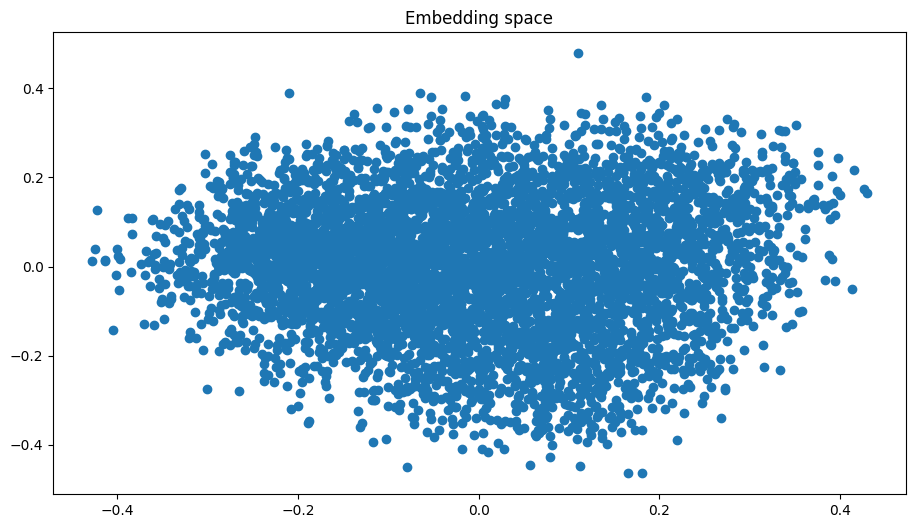

In [ ]:
pca = PCA(n_components=2)
emb_2d = pca.fit_transform(embeddings)
plt.figure(figsize=(11, 6))
plt.title('Embedding space')
plt.scatter(emb_2d[:, 0], emb_2d[:, 1])
plt.show()

In [ ]:
nn = NearestNeighbors(n_neighbors=15)
nn.fit(embeddings)

NearestNeighbors(n_neighbors=15)

In [ ]:
def recommend(text):
    emb = embed([text])
    neighbors = nn.kneighbors(emb, return_distance=False)[0]
    return df['original_title'].iloc[neighbors].tolist()

In [ ]:
print('Recommended Movies:')
recommend("criuse")

Recommended Movies:


['Спутник',
 'Pompeii',
 "Gerald's Game",
 'Jurassic World: Dominion',
 'Tron',
 'The Square',
 'A Cure for Wellness',
 'Lock Up',
 'The 13th Warrior',
 'The Current Occupant',
 'Dűne',
 'Srpski film',
 'A Week Away',
 'Pandorum',
 'Eternal Evil']